In [1]:
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft, signal

## Estrazione dei dati

In [2]:
# leggiamo i contenuti di un file audio(.wav)
audio, samplerate = sf.read("diapason.wav")

#canale 1
ch1 = audio[:,0]

#canale 2
ch2 = audio[:,1]

#### Waveform del file audio 

Text(0, 0.5, 'Ampiezza')

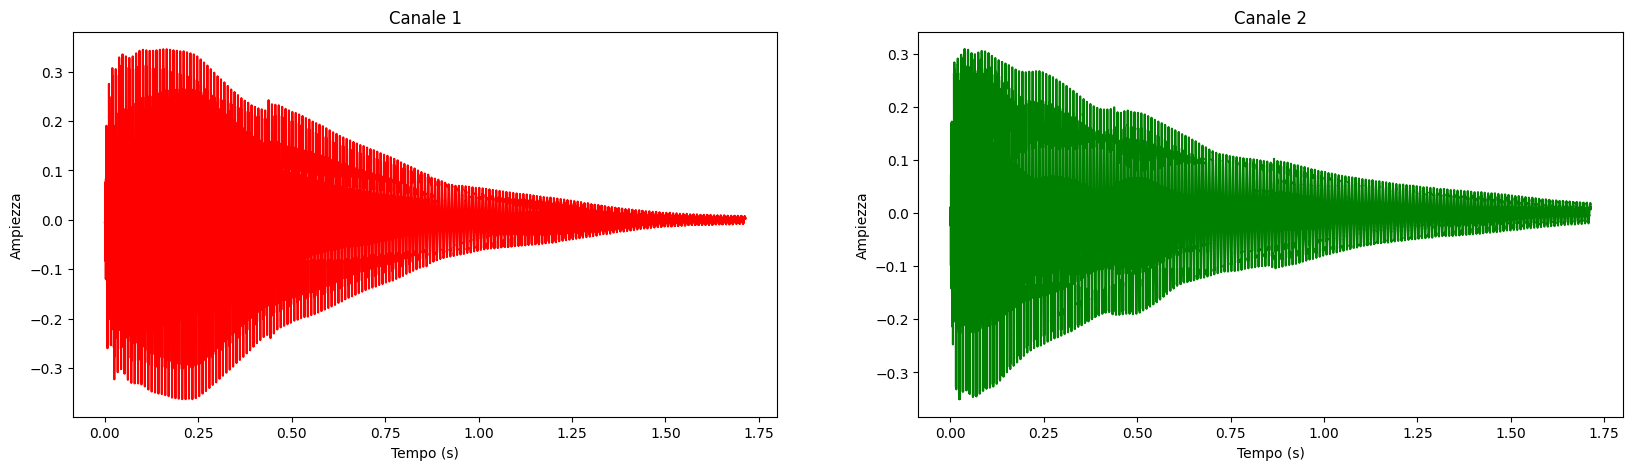

In [3]:
#per avere i secondi(asse x)
Time = np.linspace(0, len(ch1)/ samplerate, num=len(ch1))

fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

#plot canale 1
ax[0].plot(Time, ch1, "r")
ax[0].set_title("Canale 1")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Ampiezza")

#plot canale 2
ax[1].plot(Time, ch2, "g")
ax[1].set_title("Canale 2")
ax[1].set_xlabel("Tempo (s)")
ax[1].set_ylabel("Ampiezza")

### FFT(fast fourier transform) 

In [ ]:
#transformata di fourier
ch1_fft = fft.fft(ch1)

### Spettro di potenza

In [ ]:
# calcolo spettro di potenza
ch1_pwr_spectrum = np.abs(ch1_fft[:len(ch1)//2])**2
# conversione in decibel
power_spectrum_db = 10 * np.log10(ch1_pwr_spectrum) 

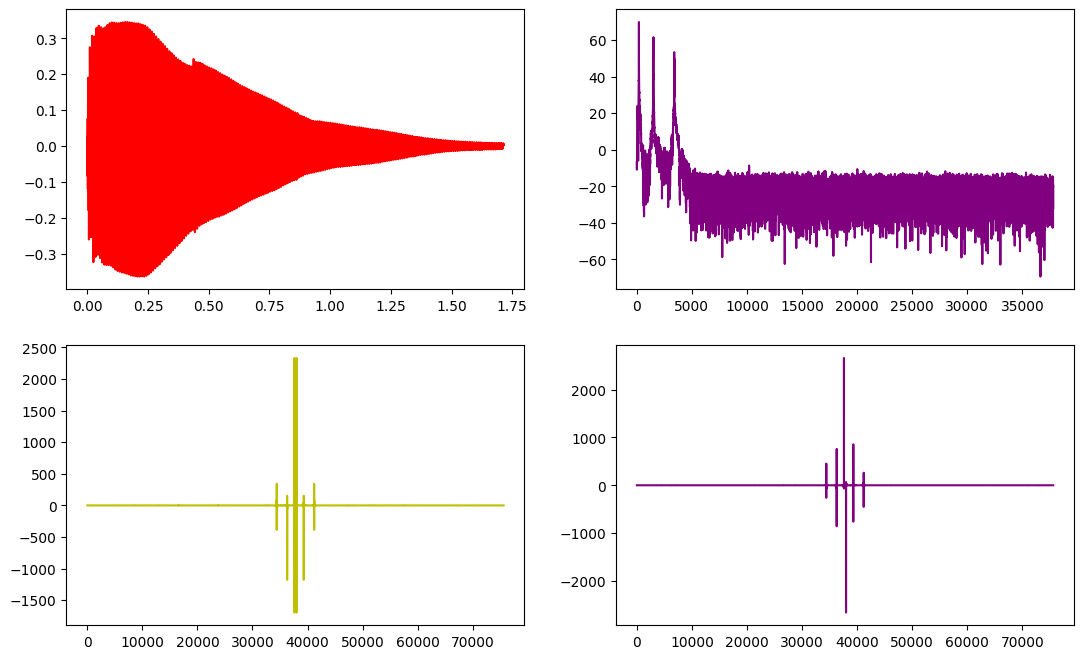

In [4]:



#creazione layout plot
fig, ax = plt.subplots(ncols=2, figsize=(13, 8))

#parte reale
ax[0].plot(np.fft.fftshift(np.real(ch1_fft)), "y")

#parte immaginaria
ax[1].plot(np.fft.fftshift(np.imag(ch1_fft)), "purple")